In [1]:
# iniatialize the directories and global variables
import os

SRC_DIR = os.getcwd()

# get the parent directory
PARENT_DIR = os.path.dirname(SRC_DIR)

# images directory
IMG_DIR = os.path.join(PARENT_DIR, 'images')
IP_IMG_DIR = os.path.join(IMG_DIR, 'input')
OP_IMG_DIR = os.path.join(IMG_DIR, 'output')

In [2]:
# import the required libraries for the project
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

Original image shape: (6000, 8000)


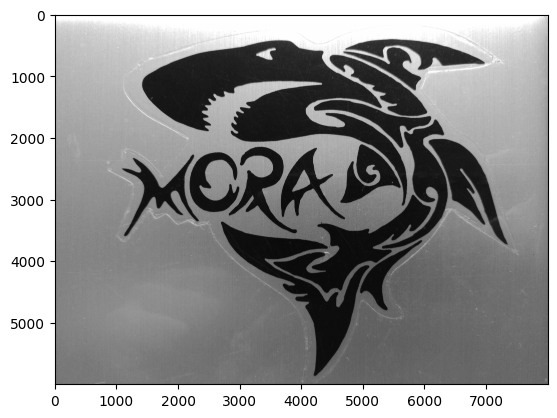

In [3]:
orgimg = cv.imread(IP_IMG_DIR + '/mora.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(orgimg, cmap='gray')
print(f'Original image shape: {orgimg.shape}')

Otsu image shape: (6000, 8000)


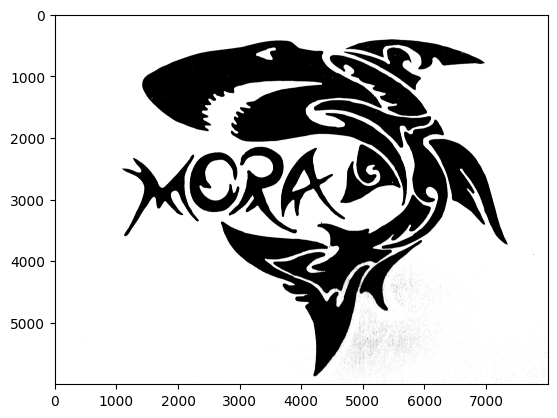

In [4]:
# otsu thresholding
ret, otsuimg = cv.threshold(orgimg, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
plt.imshow(otsuimg, cmap='gray')
print(f'Otsu image shape: {otsuimg.shape}')

Binary inverse image shape: (6000, 8000)


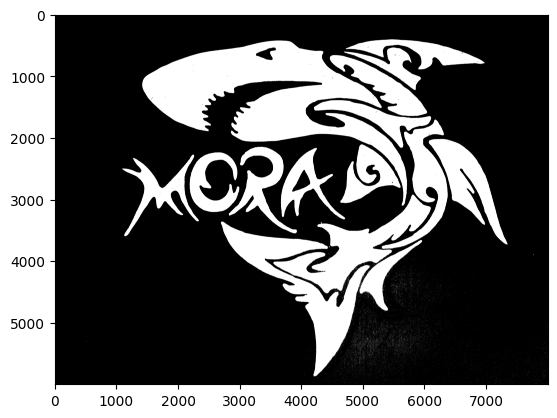

In [5]:
# binary inverse thresholding
ret, bininvimg = cv.threshold(otsuimg, 127, 255, cv.THRESH_BINARY_INV)
plt.imshow(bininvimg, cmap='gray')
print(f'Binary inverse image shape: {bininvimg.shape}')

Closing image shape: (6000, 8000)


True

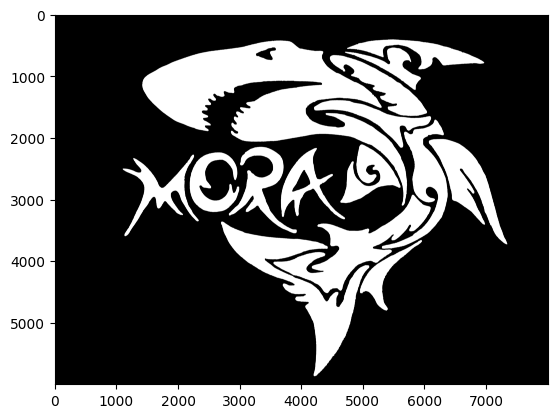

In [6]:
# Morphological transformation:  closing: Dilation followed by Erosion
ksize = 5
kernel = cv.getStructuringElement(cv.MORPH_RECT,(ksize,ksize))
opening  = cv.morphologyEx(bininvimg, cv.MORPH_OPEN, kernel, iterations=3) # remove white noise in background
closing= cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel, iterations=4) # remove black noise in foreground
plt.imshow(closing, cmap='gray')
print(f'Closing image shape: {closing.shape}')

# save high resolution images
cv.imwrite(OP_IMG_DIR + '/mora_closing.jpg', closing)

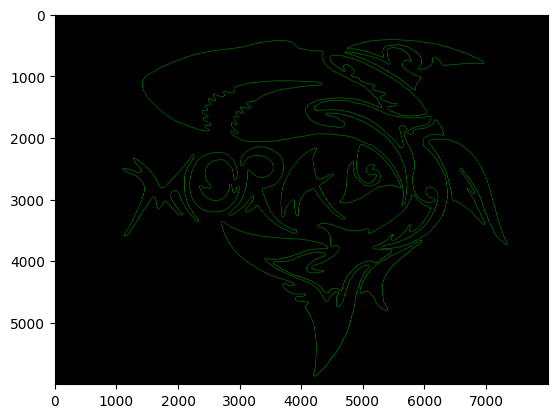

Contours image shape: (6000, 8000, 3)


True

In [7]:
# https://docs.opencv.org/3.4/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71
# cv.RETR_EXTERNAL retrieve only the extreme outer contours
contours, _ = cv.findContours(closing, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Visualizing contours (-1 argument to plot all the contours)
im_contours = np.zeros((closing.shape[0],closing.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours, contours, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts), plt.show()
print(f'Contours image shape: {conts.shape}')

# save high resolution image
cv.imwrite(OP_IMG_DIR + '/contours_external.jpg', conts)

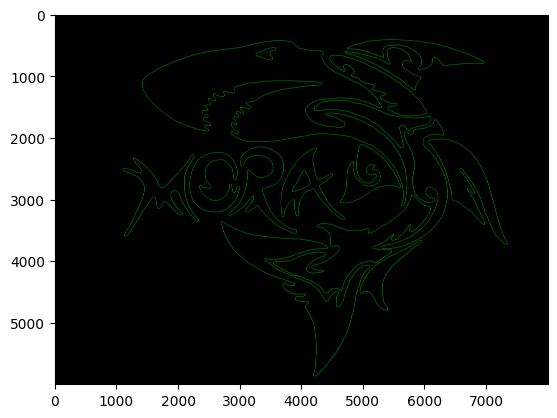

Contours image shape: (6000, 8000, 3)


True

In [8]:
# cv.RETR_CCOMP retrieves all of the contours and organizes them into a two-level hierarchy.
contours, _ = cv.findContours(closing, cv.RETR_CCOMP, cv.CHAIN_APPROX_SIMPLE)

# Visualizing contours (-1 argument to plot all the contours)
im_contours = np.zeros((closing.shape[0],closing.shape[1],3), np.uint8)
conts = cv.drawContours(im_contours, contours, -1, (0,255,0), 3).astype('uint8')
plt.imshow(conts), plt.show()
print(f'Contours image shape: {conts.shape}')

# save high resolution image
cv.imwrite(OP_IMG_DIR + '/contours_ccomp.jpg', conts)

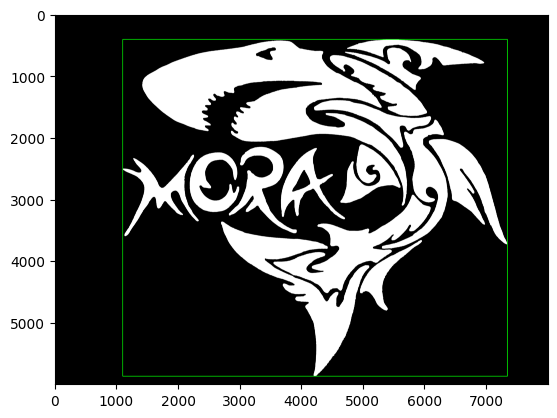

(<matplotlib.image.AxesImage at 0x7f741a1f4e60>, None)

In [9]:
# Combine all contours into one and get bounding box
cnts = np.concatenate(contours)
x,y,w,h = cv.boundingRect(cnts)

# convert closing image to color image
mora_rgb = cv.cvtColor(closing, cv.COLOR_GRAY2RGB)

# Draw bounding box on the image
img = cv.rectangle(mora_rgb,(x,y),(x+w,y+h),(0,255,0),10)

# Visualize the image
plt.imshow(img), plt.show()

Max dimension:  7241


True

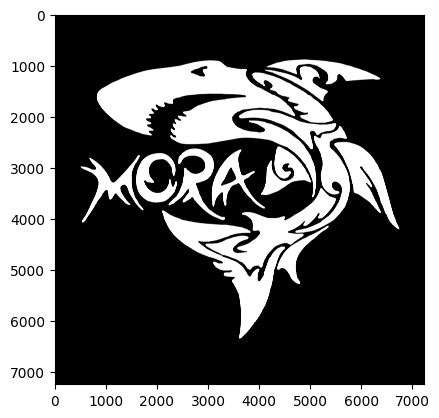

In [10]:
# margin to be added to the bounding box
margin = 500
x = x - margin
y = y - margin
w = w + 2* margin
h = h + 2* margin

# get the max of width and height
max_dim = max(w,h); print('Max dimension: ', max_dim)
# create a square image of max_dim size
square_img = np.zeros((max_dim, max_dim), np.uint8)
# get the starting point of the square image
x1 = int((max_dim - w)/2)
y1 = int((max_dim - h)/2)
# fill the square image with the closing image
for i in range(w):
    for j in range(h):
        try:
            square_img[y1+j][x1+i] = closing[y+j][x+i]
        except:
            pass
        
plt.imshow(square_img, cmap='gray')
# save high resolution image
cv.imwrite(OP_IMG_DIR + '/mora.jpg', square_img)

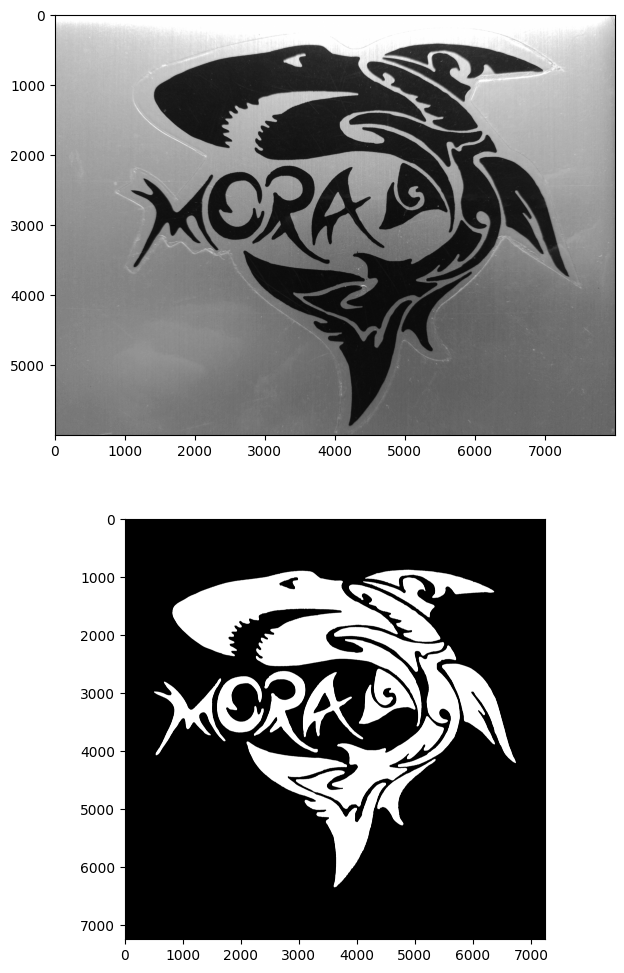

In [11]:
# compare original and final image side by side: plot hiugh resolution image
plt.figure(figsize=(10,12), dpi=100)
plt.subplot(2,1,1)
plt.imshow(orgimg, cmap='gray')
plt.subplot(2,1,2)
plt.imshow(square_img, cmap='gray')
plt.savefig(OP_IMG_DIR + '/mora_compare.jpg', bbox_inches='tight')